Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.7029 - accuracy: 0.3333 - val_loss: 0.6816 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 0s 60ms/step - loss: 0.6779 - accuracy: 0.8333 - val_loss: 0.6733 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 49ms/step - loss: 0.6626 - accuracy: 0.7500 - val_loss: 0.6657 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 53ms/step - loss: 0.6429 - accuracy: 0.7500 - val_loss: 0.6584 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 0s 46ms/step - loss: 0.6266 - accuracy: 0.7500 - val_loss: 0.6532 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 0s 45ms/step - loss: 0.6031 - accuracy: 0.7500 - val_loss: 0.6479 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 47ms/step - loss: 0.6029 - accuracy: 0.7500 - val_loss: 0.6425 - val_accuracy: 0.6667
Epoch 8/20
1/1 [=============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


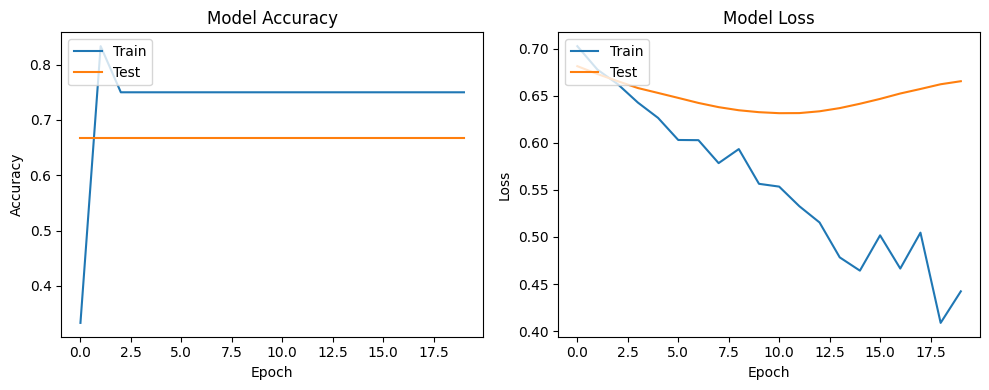

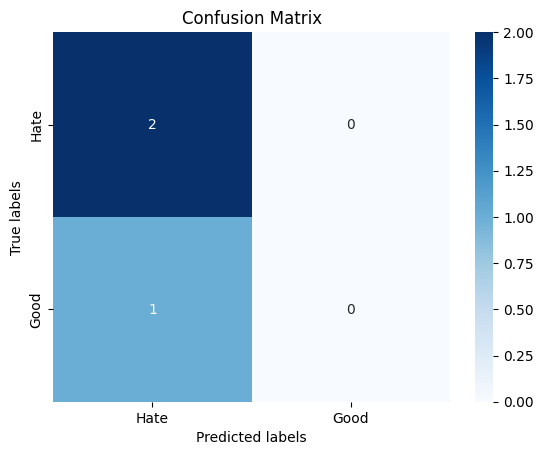

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# YouTube comments
good_comments = [
    "This video was so helpful! Thanks a lot.",
    "I really liked the content, very informative.",
    "Great job explaining, I learned a lot.",
    "Awesome video, keep up the good work.",
]

hate_comments = [
    "This video is trash, dislike.",
    "I hate this content, such a waste of time.",
    "Disgusting video, thumbs down.",
    "This video will never gets many viewers coz the idea isn't that good.",
    "I can't believe people watch this garbage.",
    "This video is so stupid, a waste of time.",
    "I can't believe people actually like this garbage.",
    "Dislike. This content is completely pointless.",
    "The worst video I've seen on YouTube. Thumbs down.",
    "Why bother uploading this? It's useless.",
    "Unsubscribed because of this video."
]

comments = good_comments + hate_comments
labels = np.array([1] * len(good_comments) + [0] * len(hate_comments))

# Tokenization
max_words = 2000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)

# Padding sequences
maxlen = 50
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# CNN model
embedding_dim = 100
filters = 128
kernel_size = 5

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),
    Conv1D(filters, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
batch_size = 32
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Prediction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred, target_names=['Hate', 'Good']))

# Plot loss and accuracy
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Confusion matrix heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hate', 'Good'], yticklabels=['Hate', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
